In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
demand_df=pd.read_csv(r'D:\Projects\DATA_ANALYST_PROJECTS\Time_Series_Forecasting_Stock_Market_&_Demand_Prediction\data\product_demand_cleaned.csv',parse_dates=['Date'])

In [3]:
agg_demand=demand_df.groupby('Date')['Order_Demand'].sum().reset_index()
agg_demand.set_index('Date',inplace=True)

In [7]:
model_demand=ARIMA(agg_demand['Order_Demand'],order=(1,0,1))
model_demand_fit=model_demand.fit()

In [8]:
print(model_demand_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Order_Demand   No. Observations:                 1729
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27504.141
Date:                Tue, 15 Apr 2025   AIC                          55016.282
Time:                        16:10:04   BIC                          55038.103
Sample:                             0   HQIC                         55024.353
                               - 1729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.969e+06   5.66e+04     52.494      0.000    2.86e+06    3.08e+06
ar.L1         -0.3248      0.084     -3.846      0.000      -0.490      -0.159
ma.L1          0.5710      0.075      7.651      0.0

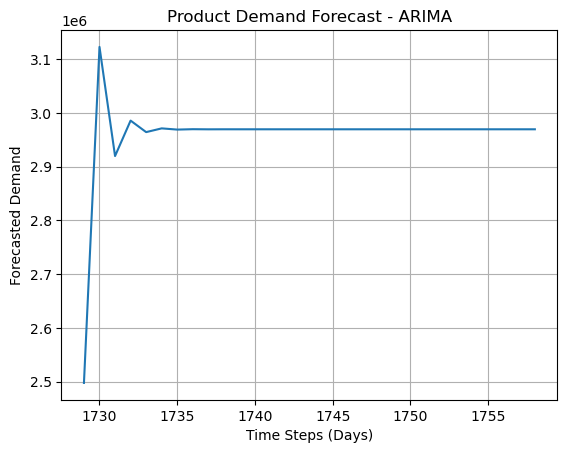

In [10]:
demand_forecast=model_demand_fit.forecast(steps=30)
demand_forecast.plot(title='Product Demand Forecast - ARIMA')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Forecasted Demand')
plt.grid(True)
plt.show()